In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
crimes = pd.read_csv('~/Downloads/cleaned_chicago_crime_data.csv')

In [76]:
# get list of unique districts 1-25
districts = crimes['District'].unique().tolist()
districts

[11.0,
 7.0,
 2.0,
 9.0,
 5.0,
 6.0,
 4.0,
 12.0,
 15.0,
 14.0,
 1.0,
 20.0,
 10.0,
 22.0,
 8.0,
 17.0,
 3.0,
 18.0,
 16.0,
 25.0,
 24.0,
 19.0,
 21.0]

In [66]:
crime_types = crimes['Primary Type'].unique().tolist()
crime_types

['BATTERY',
 'OTHER OFFENSE',
 'ROBBERY',
 'NARCOTICS',
 'CRIMINAL DAMAGE',
 'WEAPONS VIOLATION',
 'THEFT',
 'BURGLARY',
 'MOTOR VEHICLE THEFT',
 'PUBLIC PEACE VIOLATION',
 'DECEPTIVE PRACTICE',
 'ASSAULT',
 'CRIMINAL TRESPASS',
 'CRIM SEXUAL ASSAULT',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'ARSON',
 'LIQUOR LAW VIOLATION',
 'KIDNAPPING',
 'SEX OFFENSE',
 'OFFENSE INVOLVING CHILDREN',
 'PROSTITUTION',
 'HOMICIDE',
 'GAMBLING',
 'INTIMIDATION',
 'STALKING',
 'OBSCENITY',
 'PUBLIC INDECENCY',
 'HUMAN TRAFFICKING',
 'CONCEALED CARRY LICENSE VIOLATION',
 'OTHER NARCOTIC VIOLATION',
 'NON - CRIMINAL',
 'NON-CRIMINAL',
 'RITUALISM',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'DOMESTIC VIOLENCE']

In [67]:
violent_crimes = ['BATTERY','ASSAULT','CRIM SEXUAL ASSAULT', 'ARSON','HOMICIDE']
felonies = ['HUMAN TRAFFICKING', 'HOMICIDE','ARSON','KIDNAPPING','BURGLARY','ROBBERY','BATTERY','STALKING','SEX OFFENSE']

In [68]:
violents = []
for crime in violent_crimes:
    violents.append( crimes.loc[ crimes['Primary Type'] == crime] )

In [69]:
df_violent = violents[0]
for i in range(1,len(violents)):
    df_violent.append(violents[i])

In [70]:
df_violent;

In [71]:
assert len(df_violent['ID']) == len(df_violent['ID'].unique())

In [72]:
# get the total violent crime counts for chicago each year
year_range = range(df_violent['Year'].min(),df_violent['Year'].max())
df_count_violent = pd.DataFrame(index=year_range)
for i in year_range:
    df_count_violent.loc[i,'Violent Crime Count'] = len(df_violent[df_violent['Year'] == i])

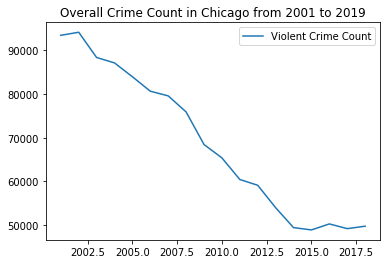

In [73]:
df_count_violent.plot(title='Overall Crime Count in Chicago from 2001 to 2019')

In [88]:
violent_districts = {}
for district in districts:
    violent_districts[district] = df_violent[df_violent['District'] == district]

In [89]:
assert districts == list(violent_districts.keys())

In [96]:
year_range = range(2001,2020)
violent_districts_time = pd.DataFrame(index=year_range)
for district in districts:
    for year in year_range:
        tmp = df_violent[ df_violent['District'] == district ]
        tmp = tmp[ tmp['Year'] == year ]
        violent_districts_time.loc[district,year] = len(tmp)

In [97]:
violent_districts_time = violent_districts_time.drop(year_range)
violent_districts_time

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
11,5938.0,6320.0,6100.0,5802.0,5794.0,5378.0,5335.0,5310.0,4876.0,4584.0,4292.0,4111.0,3846.0,3619.0,3627.0,3906.0,3734.0,3817.0,251.0
7,7625.0,8083.0,7304.0,7406.0,7008.0,6808.0,6767.0,6464.0,5185.0,5089.0,4618.0,4579.0,4213.0,3688.0,3552.0,3471.0,3322.0,3446.0,243.0
2,7833.0,6144.0,5343.0,4750.0,4488.0,4101.0,3824.0,3433.0,3069.0,3039.0,2861.0,2672.0,2422.0,2209.0,2166.0,2126.0,2276.0,2386.0,176.0
9,4645.0,5004.0,4631.0,4396.0,4480.0,4218.0,4072.0,3891.0,3479.0,3405.0,3271.0,3090.0,2721.0,2573.0,2476.0,2562.0,2309.0,2201.0,148.0
5,5279.0,5620.0,5274.0,5156.0,4710.0,4374.0,4372.0,4101.0,3918.0,3640.0,3329.0,3250.0,3001.0,2654.0,2535.0,2632.0,2542.0,2564.0,177.0
6,5191.0,5377.0,5112.0,5307.0,5335.0,5201.0,5386.0,5118.0,4382.0,4216.0,3838.0,3836.0,3725.0,3499.0,3363.0,3600.0,3545.0,3545.0,248.0
4,5589.0,5697.0,5337.0,5402.0,5277.0,5158.0,5251.0,4885.0,4292.0,4227.0,4229.0,4025.0,3532.0,3331.0,3353.0,3390.0,3369.0,3262.0,243.0
12,4393.0,4213.0,3889.0,3855.0,3674.0,3455.0,3320.0,3073.0,2771.0,2617.0,2402.0,2332.0,2119.0,1987.0,1970.0,2003.0,1921.0,1965.0,164.0
15,4127.0,4492.0,4549.0,4623.0,4389.0,4271.0,4083.0,3796.0,3655.0,3085.0,2921.0,3076.0,2955.0,2642.0,2590.0,2729.0,2404.0,2398.0,184.0
14,3724.0,3535.0,3205.0,2931.0,2657.0,2690.0,2475.0,2391.0,2285.0,2188.0,2068.0,1816.0,1564.0,1496.0,1287.0,1370.0,1340.0,1271.0,64.0


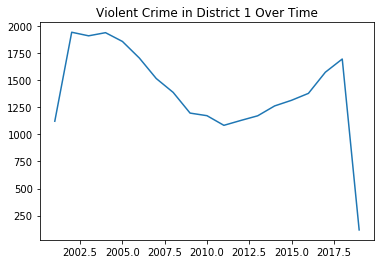

In [104]:
violent_districts_time.loc[1].plot(title='Violent Crime in District 1 Over Time')

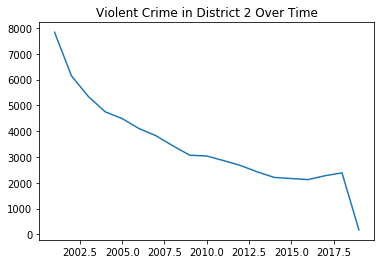

In [102]:
violent_districts_time.loc[2].plot(title='Violent Crime in District 2 Over Time')

## Find out which district has had the most total crime over the last 20 years

In [113]:
district_crime_sums = pd.DataFrame(index=districts)
for district in districts:
    district_crime_sums.loc[district,'Violent Crime Total'] = violent_districts_time.loc[district].sum()

In [118]:
district_crime_sums = district_crime_sums.sort_index()

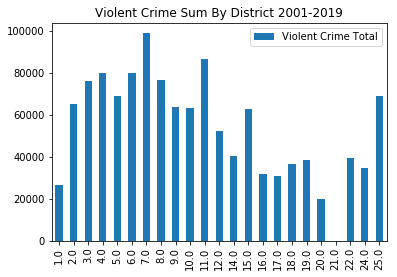

In [122]:
district_crime_sums.plot(title='Violent Crime Sum By District 2001-2019',kind='bar')

## Begin analyzing domestic crime in the dataset

In [17]:
domestic = crimes[ crimes['Domestic'] ]

In [20]:
domestic.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,8.941610e+05,8.941610e+05,894161.000000,894161.000000,818603.000000,818563.000000,8.889520e+05,8.889520e+05,894161.000000,888952.000000,888952.000000
mean,3.286043e+06,6.611507e+06,1116.020455,10.613620,20.838316,41.699817,1.164768e+06,1.879351e+06,2008.993318,41.824531,-87.671073
std,1.991380e+06,3.121523e+06,687.065389,6.789171,12.440288,20.686804,1.718408e+04,3.191784e+04,5.202183,0.087847,0.062278
min,2.000000e+00,6.480000e+02,111.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,2001.000000,36.619446,-91.686566
25%,1.538815e+06,3.677457e+06,611.000000,5.000000,9.000000,25.000000,1.151958e+06,1.855478e+06,2004.000000,41.758530,-87.717443
50%,3.244198e+06,6.889684e+06,924.000000,9.000000,20.000000,42.000000,1.165988e+06,1.872195e+06,2009.000000,41.804896,-87.666585
75%,4.976275e+06,9.355162e+06,1532.000000,15.000000,29.000000,63.000000,1.177623e+06,1.904687e+06,2013.000000,41.894263,-87.624355
max,6.802339e+06,1.158890e+07,2535.000000,25.000000,50.000000,77.000000,1.205119e+06,1.951532e+06,2019.000000,42.022645,-87.524529


In [23]:
year_range = range(domestic['Year'].min(),domestic['Year'].max())
df_count_domestic = pd.DataFrame(index=year_range)
for year in year_range:
    df_count_domestic.loc[year,'Domestic Crime Count'] = len(domestic[ domestic['Year'] == year])

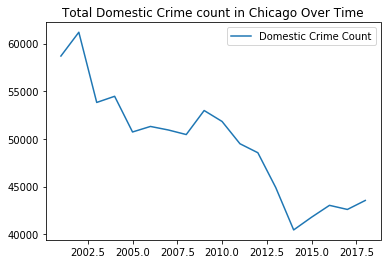

In [24]:
df_count_domestic.plot(title='Total Domestic Crime count in Chicago Over Time')